# Importaciones y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de pandas
pd.set_option('display.max_columns', None)

df = pd.read_csv("./datos_en_bruto/dataset_estudiantes.csv", sep = ',')
df.head()

def separador():
    print("---------------------------------------------------")

# Análisis exploratorio

In [2]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas {df.shape[1]}")

El número de filas que tenemos es 1000, y el número de columnas 11


In [3]:
df.columns

Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nivel_dificultad', 'tiene_tutor',
       'horario_estudio_preferido', 'estilo_aprendizaje', 'nota_final',
       'aprobado'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   horas_estudio_semanal      1000 non-null   float64
 1   nota_anterior              1000 non-null   float64
 2   tasa_asistencia            1000 non-null   float64
 3   horas_sueno                850 non-null    float64
 4   edad                       1000 non-null   int64  
 5   nivel_dificultad           1000 non-null   object 
 6   tiene_tutor                1000 non-null   object 
 7   horario_estudio_preferido  900 non-null    object 
 8   estilo_aprendizaje         950 non-null    object 
 9   nota_final                 1000 non-null   float64
 10  aprobado                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


# Requisitos del proyecto

● Análisis exploratorio.

● Preprocesamiento.

● Entrenamiento y validación del modelo de regresión.

● Entrenamiento y validación del modelo de clasificación.

# Descripción de las columnas
**horas_estudio_semanal:** Número de horas de estudio a la semana.

**nota_anterior:** Nota que obtuvo el alumno en la convocatoria anterior.

**tasa_asistencia:** Tasa de asistencia a clase en porcentaje.

**horas_sueno:** Promedio de horas que duerme el alumno al día.

**edad:** Edad del alumno.

**nivel_dificultad:** Dificultad del alumno para el estudio.

**tiene_tutor:** Indica si el alumno tiene tutor o no.

**horario_estudio_preferido:** Horario de estudio preferido por el alumno.

**estilo_aprendizaje:** Forma de estudio que emplea el alumno.

# Variables objetivo

**1. Para regresión:** nota_final (variable continua entre 0 y 100)

**2. Para clasificación:** aprobado (variable binaria: 1 si la nota es ≥ 60, 0 en caso contrario)

In [5]:
# Lo primero que vamos a buscar son columnas duplicadas, y darle un id a cada fila

df.duplicated().sum()
df.reset_index()

,index,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,12.821334,79.453807,87.058862,5.581576,22,Medio,Sí,Noche,Lectura/Escritura,78.9,1
996,996,15.200448,87.246126,90.160085,6.063783,24,Medio,Sí,Mañana,Auditivo,73.6,1
997,997,8.158924,53.324469,61.525951,6.562950,29,Fácil,No,Noche,Lectura/Escritura,65.0,1
998,998,18.582076,88.309605,96.326078,6.691088,21,Medio,Sí,Noche,Kinestésico,73.8,1


In [6]:
# Identificamos los valores nulos, hay nulos aunque no son demasiados
# df.isna().sum()
(df.isna().sum() / df.shape[0]) * 100

horas_estudio_semanal         0.0
nota_anterior                 0.0
tasa_asistencia               0.0
horas_sueno                  15.0
edad                          0.0
nivel_dificultad              0.0
tiene_tutor                   0.0
horario_estudio_preferido    10.0
estilo_aprendizaje            5.0
nota_final                    0.0
aprobado                      0.0
dtype: float64

In [7]:
# Identificamos variables numéricas y categóricas
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:\n", num_cols)
separador()
print("Cariables categóricas:\n", cat_cols)

Variables numéricas:
 Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nota_final', 'aprobado'],
      dtype='object')
---------------------------------------------------
Cariables categóricas:
 Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')


# Variables numéricas

### Estadísticas descriptivas

In [8]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
horas_estudio_semanal,1000.0,10.07,4.85,1.0,6.63,10.00,13.37,25.0
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0


## Visualizaciones

Graficar histograma para variables numéricas

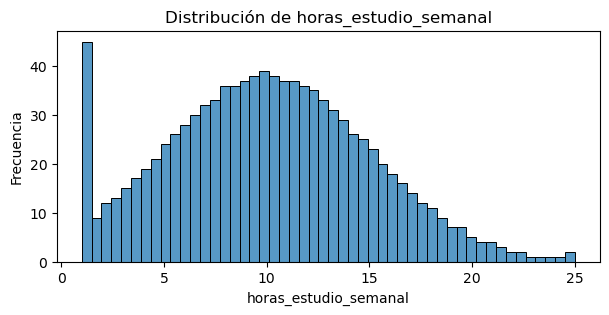

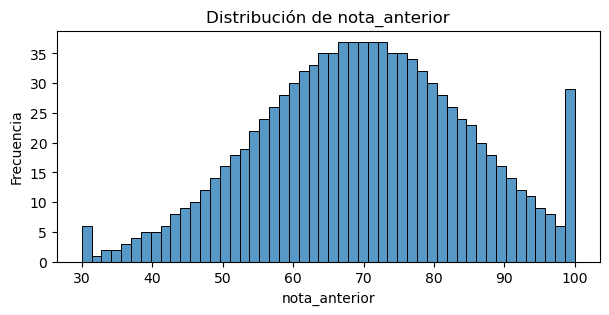

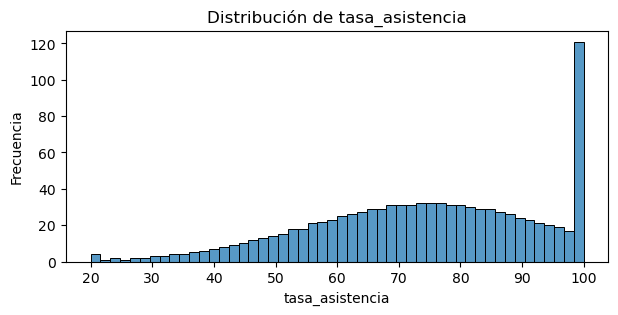

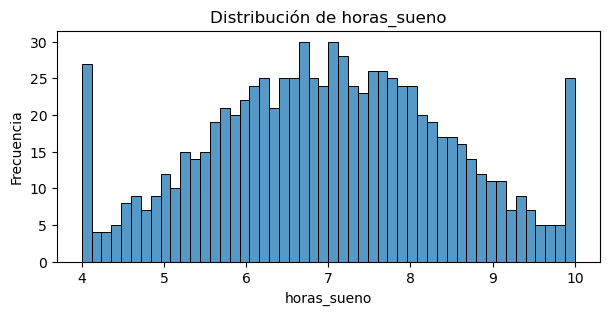

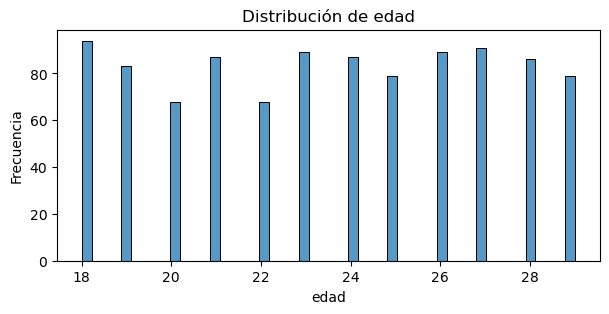

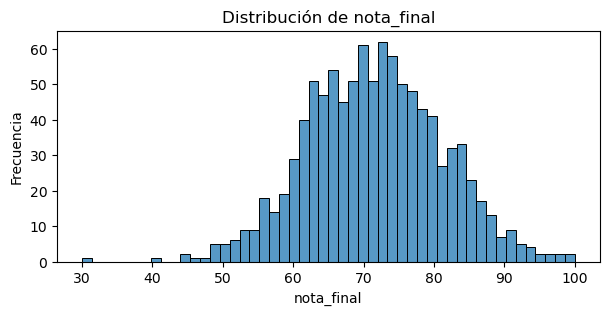

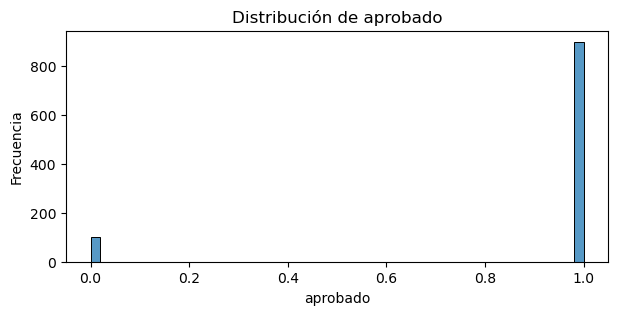

In [9]:
for col in num_cols:
    plt.figure(figsize=(7,3))
    sns.histplot(df[col], bins=50, edgecolor='black')
    
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    
    plt.show()

# Variables categóricas

### Estadísticas descriptivas

In [10]:
df.describe(include= 'object').T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,900,3,Noche,344
estilo_aprendizaje,950,4,Visual,363


### Valores únicos y frecuencias

In [11]:
for col in cat_cols:
    print(f"\n -------------- ESTAMOS ANALIZANDO LA COLUMNA: {col} -----------\n")
    print(f"Valores únicos:\n {df[col].unique}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(df[col].value_counts(normalize=True)*100)


 -------------- ESTAMOS ANALIZANDO LA COLUMNA: nivel_dificultad -----------

Valores únicos:
 <bound method Series.unique of 0        Fácil
1      Difícil
2        Fácil
3        Fácil
4        Medio
        ...   
995      Medio
996      Medio
997      Fácil
998      Medio
999      Fácil
Name: nivel_dificultad, Length: 1000, dtype: object>

Frecuencias de los valores únicos de las categorías:


nivel_dificultad
Medio      50.4
Fácil      31.3
Difícil    18.3
Name: proportion, dtype: float64


 -------------- ESTAMOS ANALIZANDO LA COLUMNA: tiene_tutor -----------

Valores únicos:
 <bound method Series.unique of 0      Sí
1      No
2      No
3      No
4      No
       ..
995    Sí
996    Sí
997    No
998    Sí
999    No
Name: tiene_tutor, Length: 1000, dtype: object>

Frecuencias de los valores únicos de las categorías:


tiene_tutor
No    59.7
Sí    40.3
Name: proportion, dtype: float64


 -------------- ESTAMOS ANALIZANDO LA COLUMNA: horario_estudio_preferido -----------

Valores únicos:
 <bound method Series.unique of 0       Tarde
1       Tarde
2      Mañana
3         NaN
4         NaN
        ...  
995     Noche
996    Mañana
997     Noche
998     Noche
999     Noche
Name: horario_estudio_preferido, Length: 1000, dtype: object>

Frecuencias de los valores únicos de las categorías:


horario_estudio_preferido
Noche     38.222222
Tarde     37.444444
Mañana    24.333333
Name: proportion, dtype: float64


 -------------- ESTAMOS ANALIZANDO LA COLUMNA: estilo_aprendizaje -----------

Valores únicos:
 <bound method Series.unique of 0      Lectura/Escritura
1                    NaN
2      Lectura/Escritura
3                 Visual
4               Auditivo
             ...        
995    Lectura/Escritura
996             Auditivo
997    Lectura/Escritura
998          Kinestésico
999               Visual
Name: estilo_aprendizaje, Length: 1000, dtype: object>

Frecuencias de los valores únicos de las categorías:


estilo_aprendizaje
Visual               38.210526
Auditivo             26.736842
Kinestésico          18.736842
Lectura/Escritura    16.315789
Name: proportion, dtype: float64

## Visualizaciones

Graficar histograma para variables categóricas

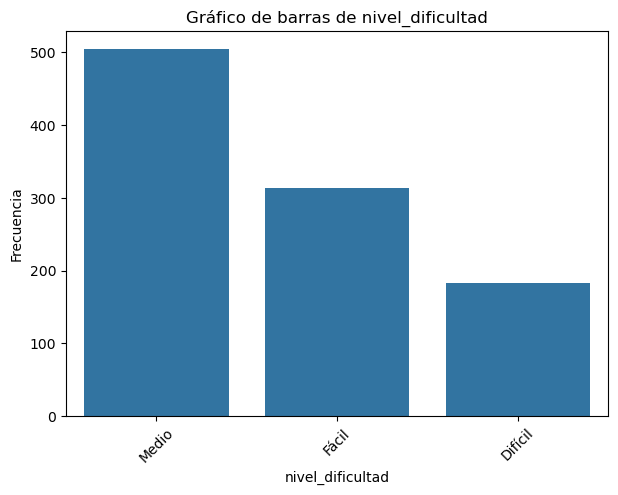

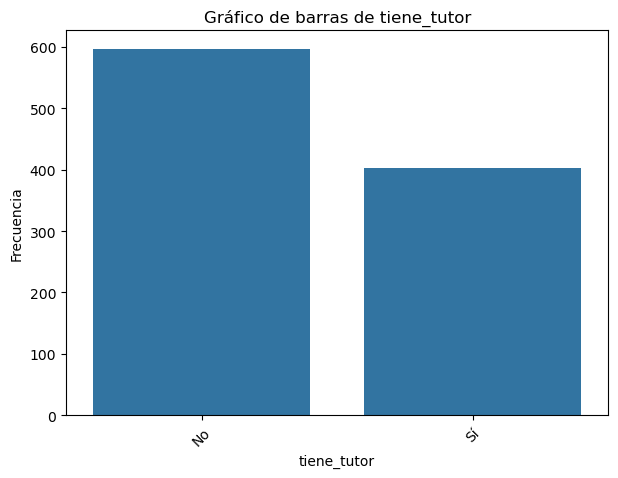

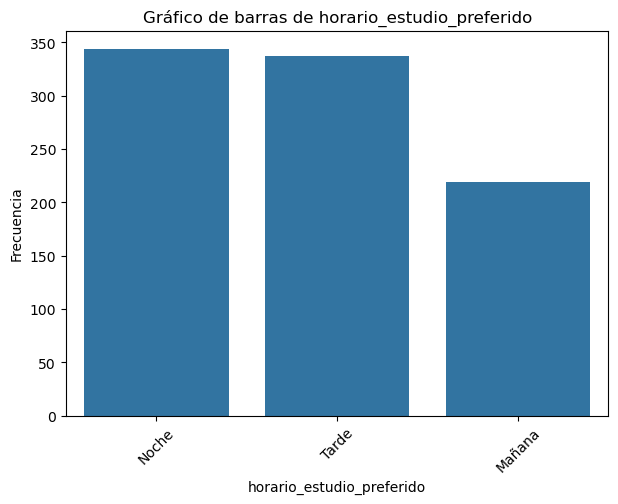

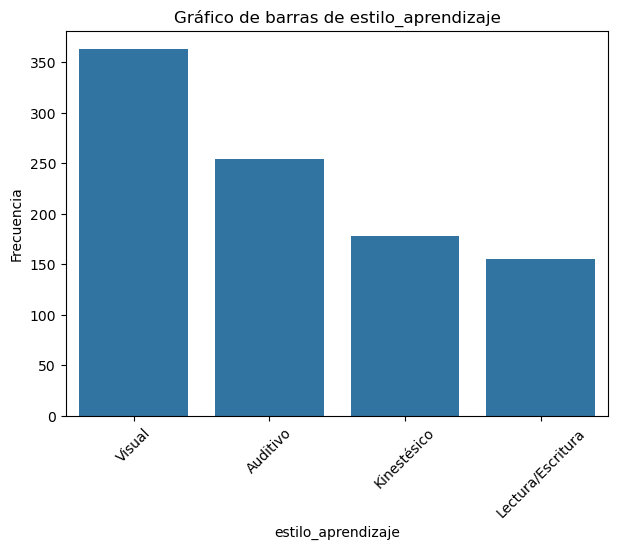

In [12]:
for col in cat_cols:
    num_categories = df[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5 # altura fija
    
    plt.figure(figsize=(width, height))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    
    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    
    plt.show()

# Matriz de correlación

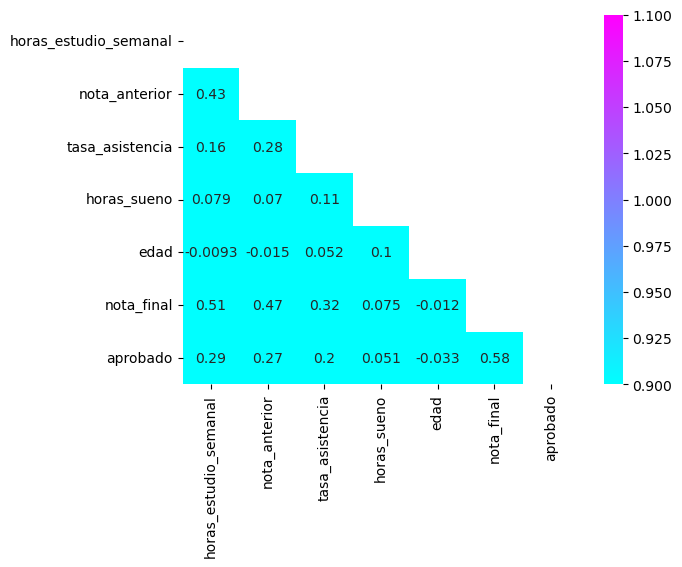

In [13]:
# Calcular la matriz de correlación
corr_matriz = df.corr(numeric_only=True)

#Crear la figura
plt.Figure(figsize=(10,10))

# Crear una máscara para mostrar solo la parte triangular
mask = np.triu(np.ones_like(corr_matriz, dtype=bool))

# Graficar el mapa de calor
sns.heatmap(corr_matriz,
            annot=True,
            vmin=1,
            vmax=1,
            mask=mask,
            cmap='cool')

plt.show()

## Conclusión correlaciones:

#### Correlaciones más altas:

nota_anterior / horas_estudio_semanal

nota_final / horas_estudio_semanal

nota_final / nota_anterior

nota_final / Aprobado

#### Algunas correlaciones más débiles:

edad / horas_estudio_semanal

edad / nota_anterior

edad / tasa_asistencia




––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

## Relaciones cruzadas

### Variable objetivo numérica: nota_final

Generamos gráficos de dispersión

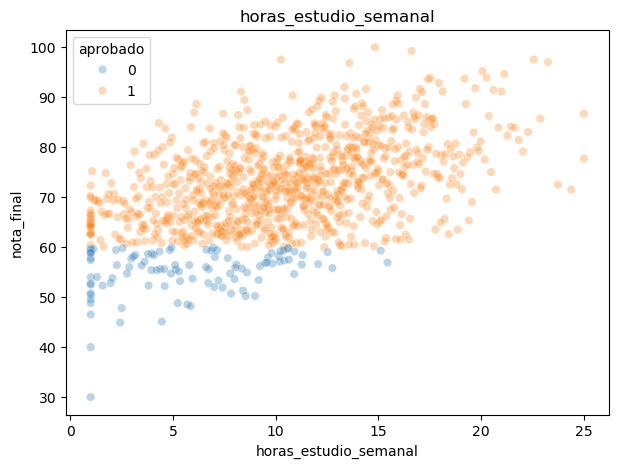

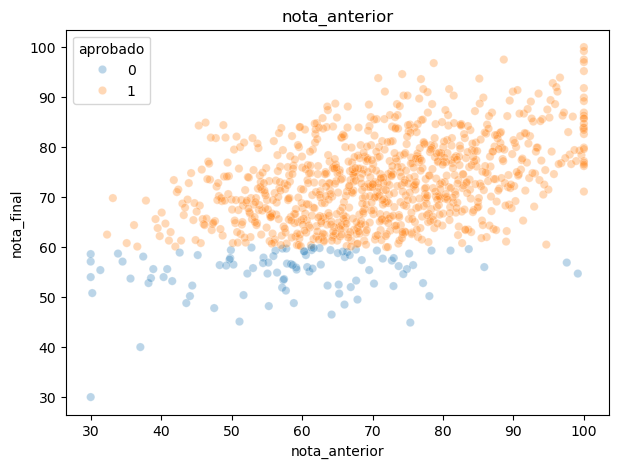

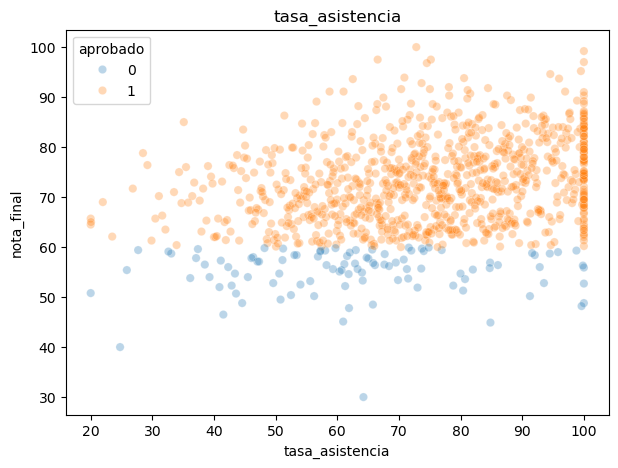

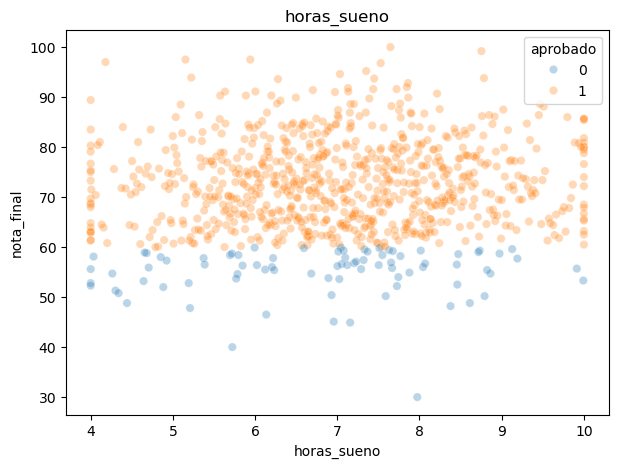

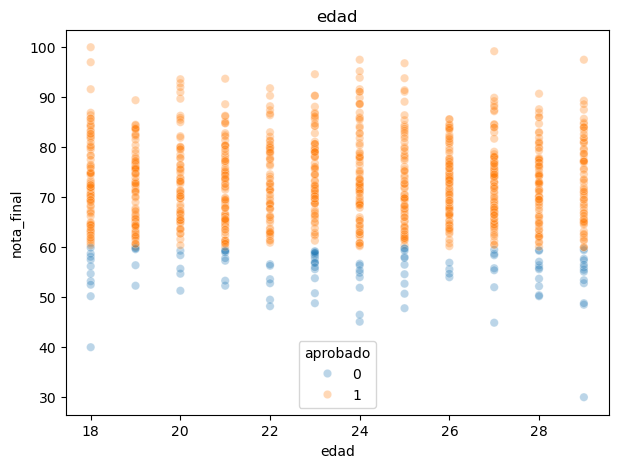

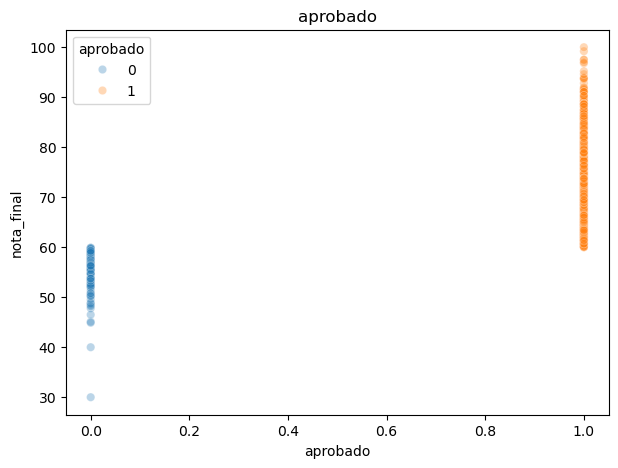

In [14]:
# Definir la variable objetivo
tv = 'nota_final' # target variable

# Definir DataFrame y variables numéricas
df_num = df.select_dtypes(include=np.number).drop(columns=[tv], errors='ignore')
cols_num = df_num.columns

# Generar gráficos de dispersión
for col in cols_num:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=df[col], y=df[tv], hue=df['aprobado'], alpha=0.3)
    # sns.scatterplot(x=df[col], y=df[tv])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.show()
    

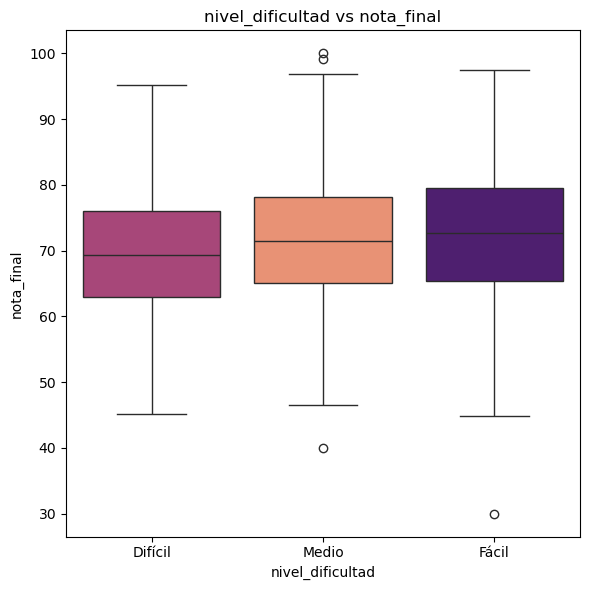

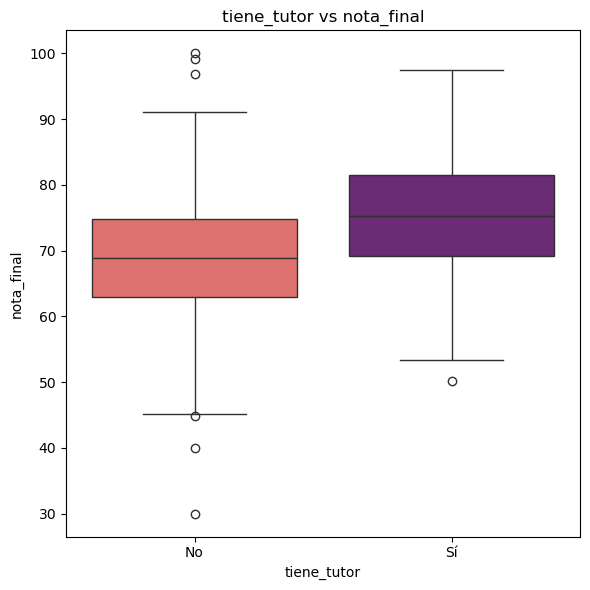

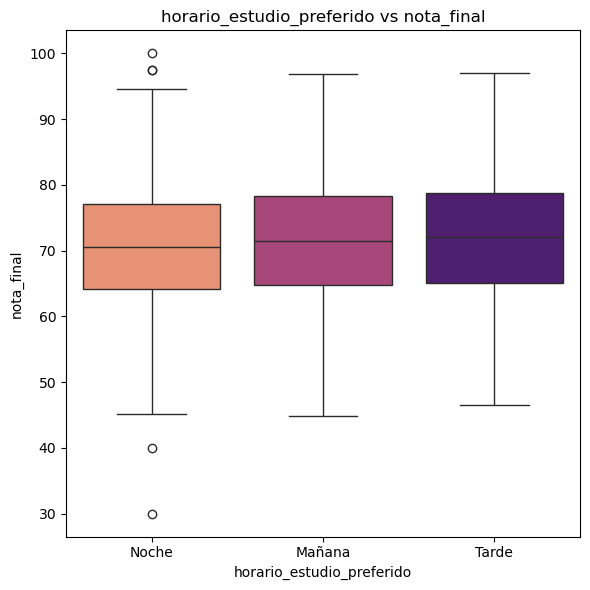

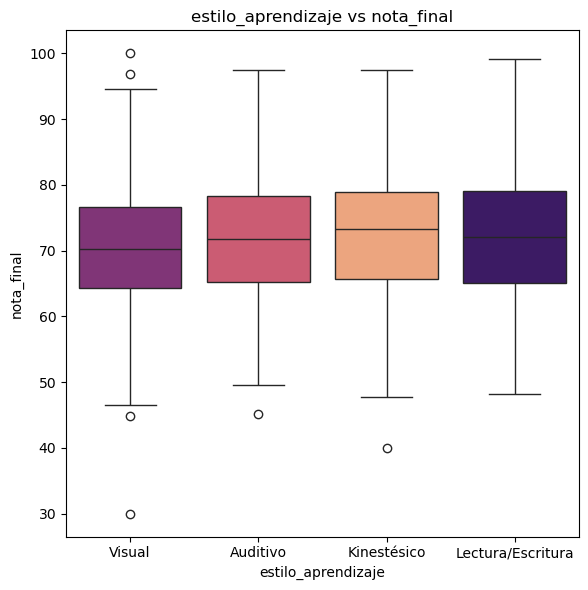

In [15]:
# Definir la variable objetivo
tv = 'nota_final' # target variable

# Generar gráficos independientes para cada variable categórica
for col in cat_cols:
    # Calcular el número de categorías únicas
    num_cats = df[col].nunique()
    
    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = min(max(6, num_cats * 1.5), 25) # Anchi mínimo de 6, max de 25
    fig_height = 6
    
    # Ordenar las categorías por el promedio de la variable objetivo
    ordered_cats = df.groupby(col)[tv].mean().sort_values().index
    
    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=df[col], y=df[tv], hue=df[col], data=df, order=ordered_cats, palette='magma', legend=False)
    
    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.tight_layout()
    plt.show()

## Relaciones cruzadas

### Variable objetivo categórica: aprobado


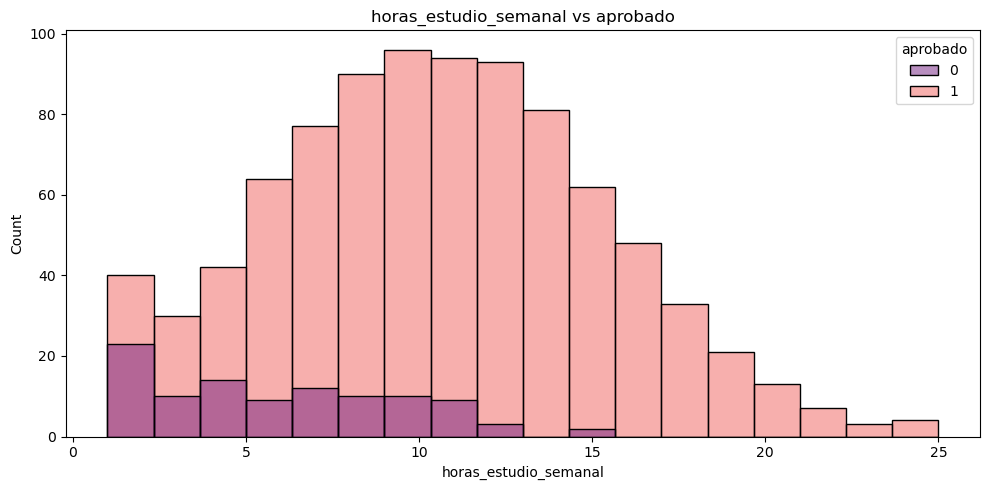

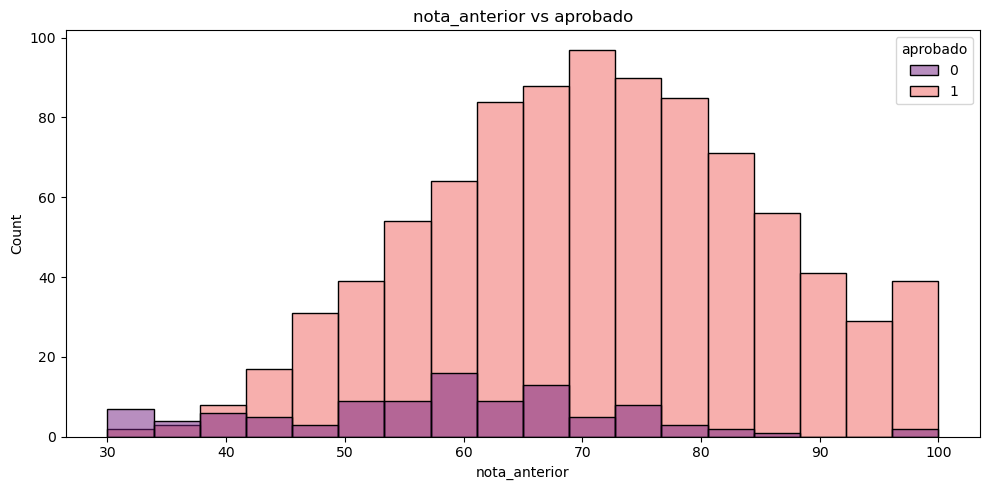

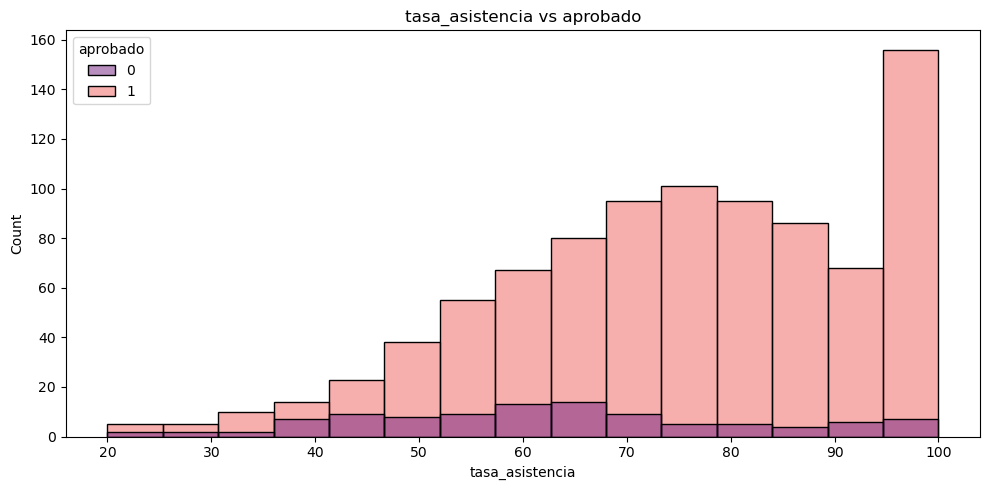

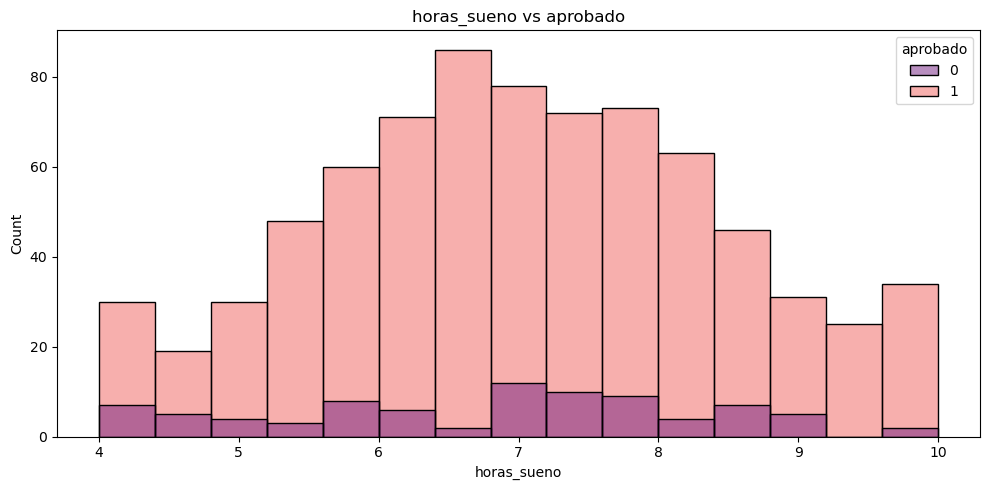

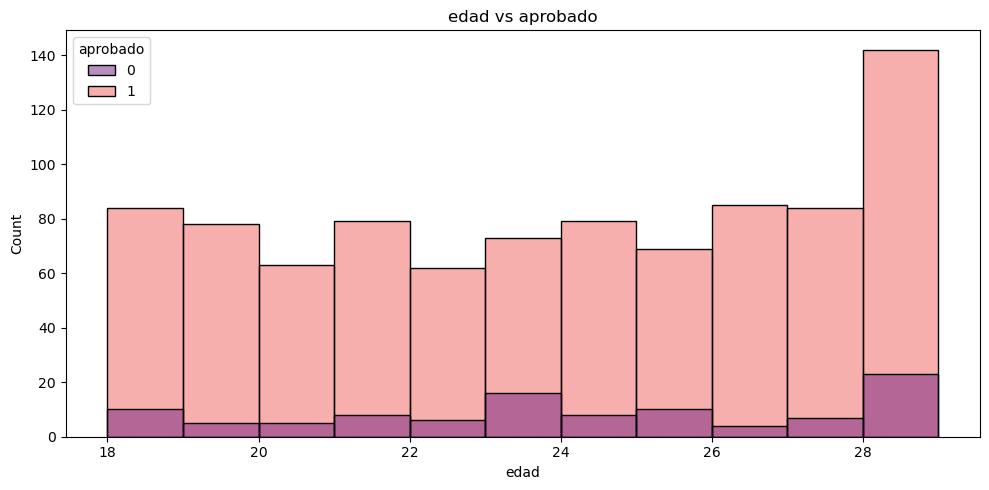

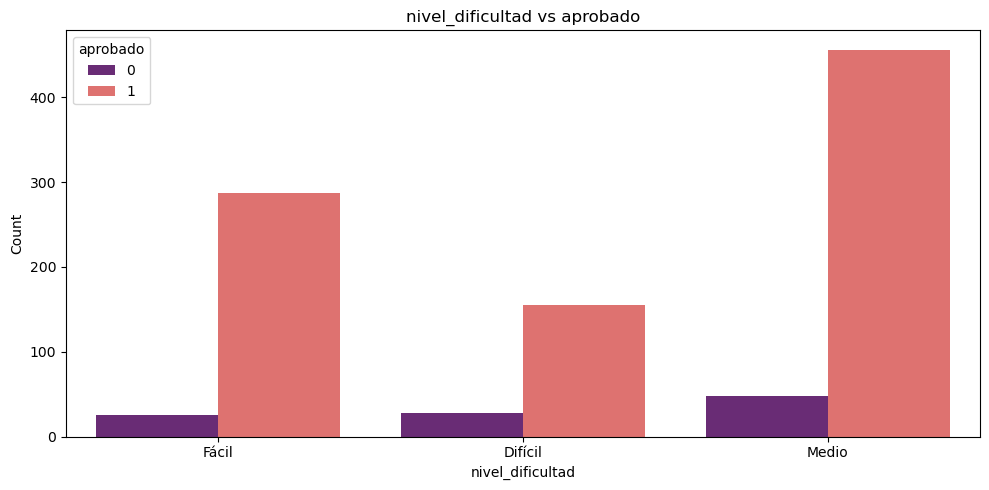

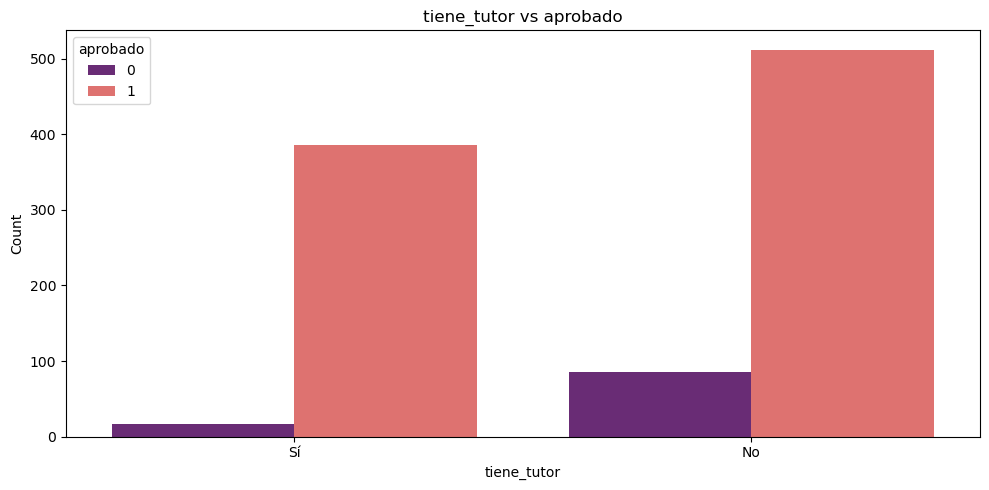

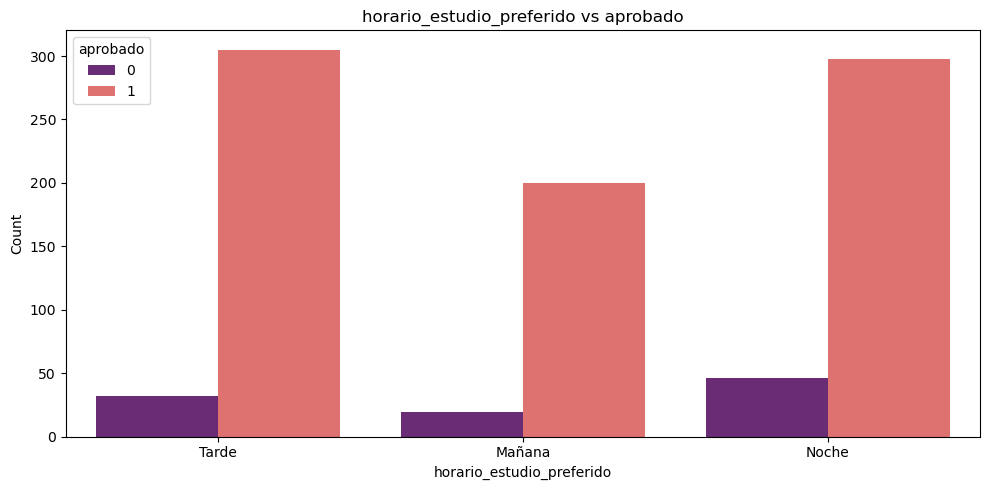

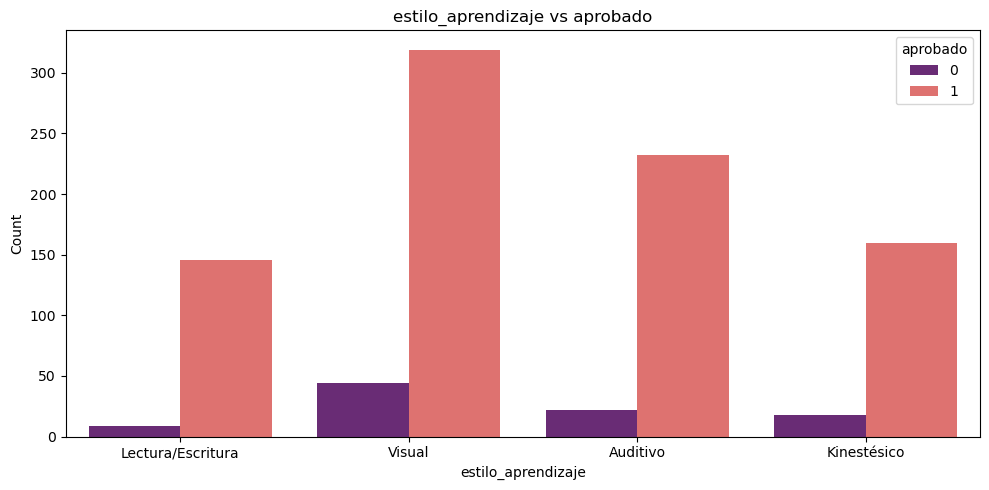

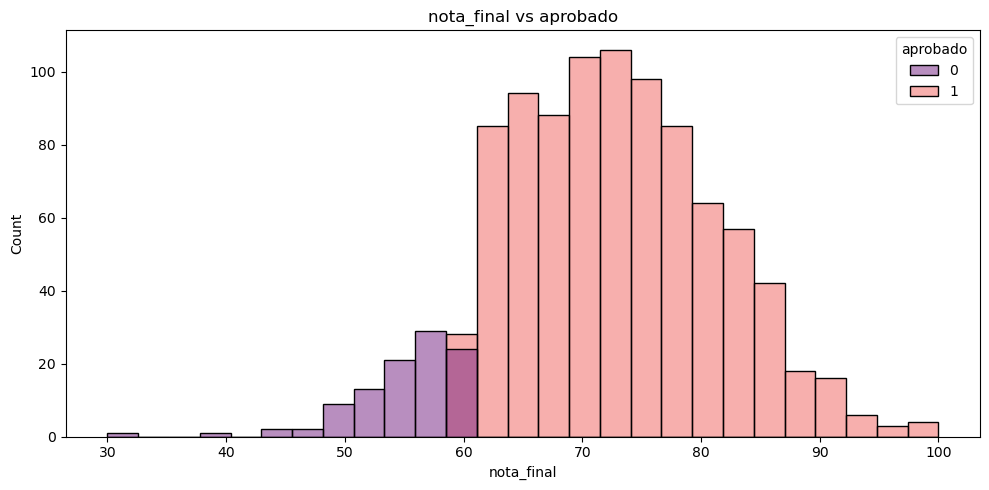

In [16]:
# Definir la variable objetivo
tv = 'aprobado'

for col in df.columns:
    # Saltar la variable objetivo
    if col == tv:
        continue
    
    plt.figure(figsize=(10,5))
    
    if col in num_cols:
        sns.histplot(x=df[col], hue=df[tv], data=df, palette="magma", legend=True)
    elif col in cat_cols:
        sns.countplot(x=df[col], hue=df[tv], data=df, palette="magma")
        
    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Análisis de incosistencias

In [17]:
inconsistencias = []

# Regla 1: nota_anterior no puede ser mayor a 100
mask = df['nota_anterior'] > 100
for i in df.index[mask]:
    inconsistencias.append((i, 'nota_anterior > 100'))

# Regla 2: nota_anterior no puede ser menor a 0
mask = df['nota_anterior'] < 0
for i in df.index[mask]:
    inconsistencias.append((i, 'nota_anterior < 0'))

# Regla 3: tasa_asistencia no puede ser mayor a 100
mask = df['tasa_asistencia'] > 100
for i in df.index[mask]:
    inconsistencias.append((i, 'tasa_asistencia > 100'))

# Regla 4: tasa_asistencia no puede ser menor a 0
mask = df['tasa_asistencia'] < 0
for i in df.index[mask]:
    inconsistencias.append((i, 'tasa_asistencia < 0'))

# Regla 5: horas_sueno no puede ser mayor a 24
mask = df['horas_sueno'] > 24
for i in df.index[mask]:
    inconsistencias.append((i, 'horas_sueno > 24'))

# Regla 6: horas_sueno no puede ser menor a 0
mask = df['horas_sueno'] < 0
for i in df.index[mask]:
    inconsistencias.append((i, 'horas_sueno < 0'))

# Regla 7: edad no puede ser mayor a 65
mask = df['edad'] > 65
for i in df.index[mask]:
    inconsistencias.append((i, 'edad > 65'))

# Regla 8: edad no puede ser menos a 16
mask = df['edad'] < 16
for i in df.index[mask]:
    inconsistencias.append((i, 'edad < 16'))

# Regla 9: nota_final no puede ser mayor a 100
mask = df['nota_final'] > 100
for i in df.index[mask]:
    inconsistencias.append((i, 'nota_final > 100'))

# Regla 10: nota_final no puede ser menor a 0
mask = df['horas_sueno'] < 0
for i in df.index[mask]:
    inconsistencias.append((i, 'horas_sueno < 0'))
    
# Crear DataFrame de inconsistencias
inconsistencias_df = pd.DataFrame(inconsistencias, columns=['Index', 'Inconsistencias'])

# Obtener los índices únicos de las inconsistencias
inconsistencias_indices = inconsistencias_df['Index'].unique()

# Filtrar el DataFrame original
df_inconsistencias_rows = df.loc[inconsistencias_indices]


In [18]:
# Vemos que no hay inconsistencias
inconsistencias_df['Inconsistencias'].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
# No hay, si huebiese, las eliminaríamos
df_inconsistencias_rows.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado


In [20]:
# guardamos el fichero
df.to_csv('./datos_transformados/dataset_estudiantes_EDA.csv', index=False)